เราจะมาลองเทรน 2 โมเดล เปรียบเทียบโมเดล ที่ใช้ Data Augmentation และไม่ใช้ ว่า Validation Loss จะต่างกันอย่างไร

# 0. Magic Commands


In [5]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# 1. Import Library

In [6]:
from fastai import *
from fastai.vision import *
from fastai.metrics import accuracy

# 2. ข้อมูล



In [3]:
path = untar_data(URLs.PETS)
path_images = path/'images'

ประกาศฟัง์ชัน สร้าง databunch และฟังก์ชันแสดงภาพ

In [40]:
def get_databunch(transform):
    batchsize = 32
    np.random.seed(0)
    regex_pattern = r'/([^/]+)_\d+.jpg$'

    return ImageDataBunch.from_name_re(path_images, filenames, 
                                       regex_pattern, ds_tfms=transform, 
                                       size=224, bs=batchsize).normalize(imagenet_stats)

def get_ex(): return open_image(f'{path_images}/pug_147.jpg')

def plots_f(rows, cols, width, height, **kwargs):
    [get_ex().apply_tfms(transform[0], **kwargs).show(ax=ax) for i,ax in enumerate(plt.subplots(
        rows,cols,figsize=(width,height))[1].flatten())]

# 3. เตรียมข้อมูล

เราจะไปสร้าง DataBunch พร้อมสร้างโมเดลจะได้สะดวกในการเปรียบเทียบ

# 4. สร้างโมเดล



## No Data Augmentation
ปิด Data Augmentaion ทุกอย่าง

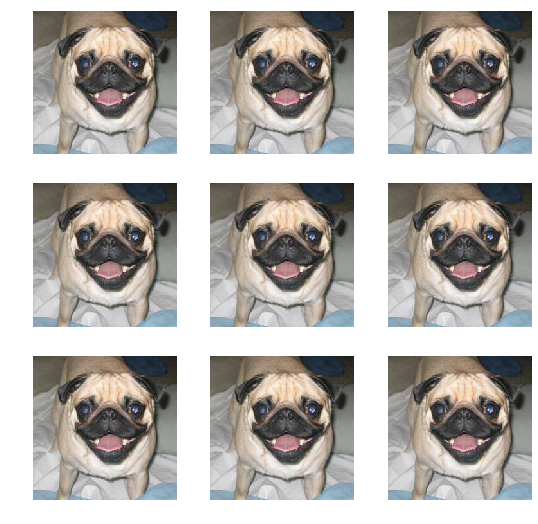

In [41]:
# transform = get_transforms(do_flip=False, flip_vert=False, max_rotate=0.0, max_zoom=1.0, max_lighting=0.0, max_warp=0.0, p_affine=0.0, p_lighting=0.0)
transform = zoom_crop(scale=(1.0,1.0), do_rand=False)
databunch = get_databunch(transform)
learner = cnn_learner(databunch, models.resnet34, 
                      metrics=accuracy, callback_fns=ShowGraph)
plots_f(3, 3, 9, 9, size=224)

In [ ]:
learner.fit_one_cycle(8)

เคลียร์ Memory

In [9]:
learner = None
gc.collect()

28

## Data Augmentation
เปิด Data Augmentaion ทุกอย่าง

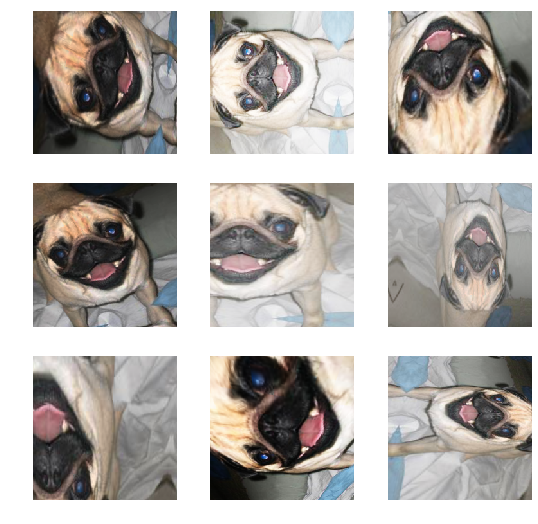

In [44]:
# transform = get_transform()
transform = get_transforms(do_flip=True, flip_vert=True, max_rotate=30.0, max_zoom=1.5, max_lighting=0.5, max_warp=0.5, p_affine=0.75, p_lighting=0.75)
databunch = get_databunch(transform)
learner = cnn_learner(databunch, models.resnet34, 
                      metrics=accuracy, callback_fns=ShowGraph)
plots_f(3, 3, 9, 9, size=224)

In [ ]:
learner.fit_one_cycle(8)

# 8. สรุป


เปรียบเทียบ



# Credit 

* [FastAI: Practical Deep Learning for Coders, v3 - Lesson 1](https://course.fast.ai/videos/?lesson=1)
* [vision.transform](https://docs.fast.ai/vision.transform.html#get_transforms)
* [Data Augmentation | How to use Deep Learning when you have Limited Data — Part 2](https://medium.com/nanonets/how-to-use-deep-learning-when-you-have-limited-data-part-2-data-augmentation-c26971dc8ced)